In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import box
import matplotlib.patches as patches
import random
from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [377]:
df = pd.read_csv("tree (2).csv", index_col=False)
df = df.drop(columns=["Unnamed: 0"])

In [ ]:
# data cleaning
df_su_2018 = pd.read_csv("summer_2018.csv", sep=";")
df_su_2019 = pd.read_csv("summer_2019.csv", sep=";")
df_su_2020 = pd.read_csv("summer_2020.csv", sep=";")
df_win_2018 = pd.read_csv("winter_2018.csv", sep=";")
df_win_2019 = pd.read_csv("winter_2019.csv", sep=";")
df_win_2020 = pd.read_csv("winter_2020.csv", sep=";")

df_su_2018_m = df_su_2018.loc[:, ["Latitude", "Longitude", "Grund der Fällung", "Deutsch", "Stammumfang"]]
df_su_2019_m = df_su_2019.loc[:, ["Latitude", "Longitude", "Grund_der_Faellung", "Deutsch", "Stammumfang"]]
df_su_2020_m = df_su_2020.loc[:, ["latitude", "longiude", "grund_der_faellung", "deutsch", "stammumfang"]]
df_win_2018_m = df_win_2018.loc[:, ["latitude", "longitude", "grund_fuer_faellung", "deutsch", "stammumfang"]]
df_win_2019_m = df_win_2019.loc[:, ["latitude", "longitude", "grund der faellung", "deutsch", "stammumfang"]]
df_win_2020_m = df_win_2020.loc[:, ["Latitude", "Longitude", "Grund_der_Faellung", "Deutsch", "Stammumfang"]]

df_su_2018_n = df_su_2018_m.rename(columns={"Latitude": "lat", "Longitude": "lon", "Grund der Fällung": "reason", "Deutsch": "name", "Stammumfang": "dia"})
df_su_2019_n = df_su_2019_m.rename(columns={"Latitude": "lat", "Longitude": "lon", "Grund_der_Faellung": "reason", "Deutsch": "name", "Stammumfang": "dia"})
df_su_2020_n = df_su_2020_m.rename(columns={"latitude": "lat", "longiude": "lon", "grund_der_faellung": "reason", "deutsch": "name", "stammumfang": "dia"})
df_win_2018_n = df_win_2018_m.rename(columns={"latitude": "lat", "longitude": "lon", "grund_fuer_faellung": "reason", "deutsch": "name", "stammumfang": "dia"})
df_win_2019_n = df_win_2019_m.rename(columns={"latitude": "lat", "longitude": "lon", "grund der faellung": "reason", "deutsch": "name", "stammumfang": "dia"})
df_win_2020_n = df_win_2020_m.rename(columns={"Latitude": "lat", "Longitude": "lon", "Grund_der_Faellung": "reason", "Deutsch": "name", "Stammumfang": "dia"})

df_su_2018_n["year"] = 2018
df_su_2018_n["season"] = "so"
df_su_2019_n["year"] = 2019
df_su_2019_n["season"] = "so"
df_su_2020_n["year"] = 2020
df_su_2020_n["season"] = "so"
df_win_2018_n["year"] = 2018
df_win_2018_n["season"] = "win"
df_win_2019_n["year"] = 2019
df_win_2019_n["season"] = "win"
df_win_2020_n["year"] = 2020
df_win_2020_n["season"] = "win"

frames = [df_su_2018_n, df_su_2019_n, df_su_2020_n, df_win_2018_n, df_win_2019_n, df_win_2020_n]
df = pd.concat(frames, ignore_index=True)

reason_dict = {"trocken": "Trocken", "ausgebrochen": "Ausgebrochen", 
              "abgestorben": "Abgestorben", "absterbend": "Absterbend", 
              "Baumaßnahme": "Baummaßnahme", "Baummaßnahme": "Baummaßnahme", 
              "Dichtstand": "Dichtstand", "Druckzwiesel": "Druckzwiesel", 
              "Fäule": "Fäule", "Komplexerkrankung": "Komplexerkrankung", 
              "Morschung": "Morschung", "Pilzbefall": "Pilzbefall", 
              "Pseudomonas": "Pseudomonas", "Brandschaden": "Brandschaden",
              "Rußrindenkrankheit": "Rußrindenkrankheit", "fäule": "Fäule",
              "Schrägstand": "Schrägstand", "Stamm": "Stammschaden",
              "Sturmschaden": "Sturmschaden", "Vandalismus": "Sachbeschädigung",
              "Unfall": "Unfallschaden", "Vandalismus": "Vandalismus", 
              "Riss": "Riss", "Wurzel": "Wurzelschäden", "32352876.84": "Sonst",
               "Bundesbahn": "Sachbeschädigung", "Neubaumaßnahme": "Baummaßnahme", 
               "Gefahr für den Öltank des Kapellengebäudes": "Gefahr",
               "Druckzwiesel": "Zwiesel", "Zwiessel": "Zwiessel",
               "Massiver Vitalitätsrückang durch 2malig Injektion von Natriumchlorad und Glyphoshat in 10 Bohrlöcher ringsum im unteren Baumstammbereich. Bekannte Injektionszeiträume März 2016 und April 2018. Täter ist unbekannt: Zeugen wurden nicht gefunden":
               "Sachbeschädigung", }

for i in range(df.shape[0]):
  if pd.isnull(df.iloc[i]["reason"]):
    df.loc[i, "reason"] = "Sonst"
  else:
    for r in reason_dict.keys():
      if r in str(df.iloc[i]["reason"]):
        df.loc[i, "reason"] = reason_dict[r]

df.to_csv("tree.csv")

In [100]:
color_dict = {'Abgestorben': 'dodgerblue',
 'Absterbend': 'g',
 'Fäule': 'r',
 'Morschung': 'c',
 'Pilzbefall': 'm',
 'Rußrindenkrankheit': 'y',
 'Schrägstand': 'k',
 'Sonst': 'slateblue',
 'Stammschaden': 'lime',
 'Sturmschaden': 'violet',
 "Morschung": "skyblue",
 "Schrägstand": "teal",
 "Komplexerkrankung": "brown",
 "Riss": "olive",
 "Unfallschaden": "bisque",
 "Sachbeschädigung": "plum",
 "Baummaßnahme": "tomato",
 "Trocken": "azure",
 "Pseudomonas": "tan",
 "Lackporling": "hotpink",
 "zu dichter Stand": "orchid",
 "Gefahr": "honeydew",
 "Druckzwiesel": "beige",
 "massiver Rindenschaden": "wheat",
 "Zwiesel": "gray"}

color_dict2 = {"Ahorn":"g",
"Bergahorn": "hotpink",
"Echte Mehlbeere": "r",
"Hainbuche": "c",
"Kirsche": "y",
"Robinie": "teal",
"Sandbirke": "m",
"Scheinakazie": "lime",
"Holländische Linde": "tan",
"Spitzahorn": "plum",
"Abgestorben": "olive",
"Eberesche": "bisque",
"Feldahorn": "violet",
"Stiel-Eiche": "tomato",
"Rosskastanie": "skyblue"}

In [22]:
def combine_smallest(df,column, n, replacement="Sonst"):
  most_common = df[column].value_counts().index.tolist()[:n-1]
  df.loc[~df[column].isin(most_common) , column] = replacement

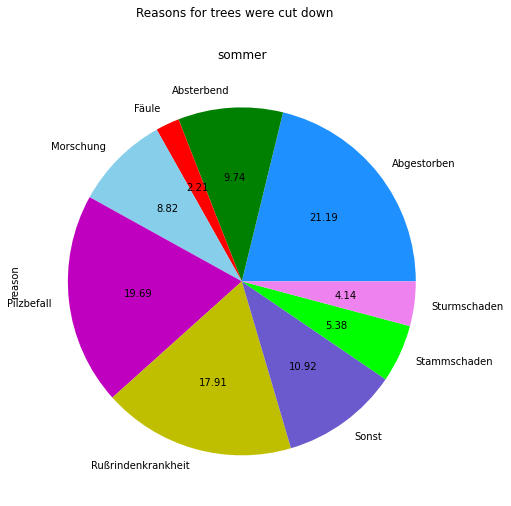

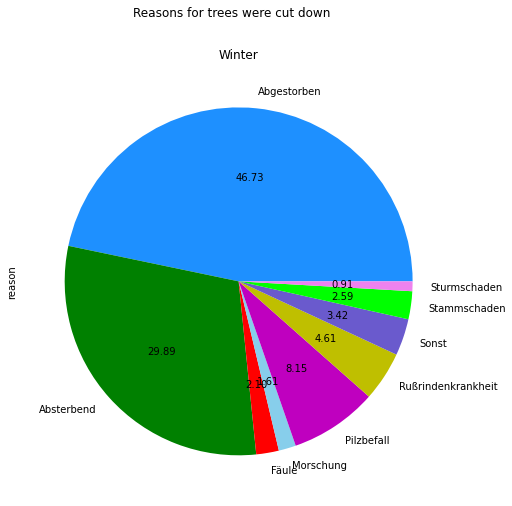

In [113]:
df = pd.read_csv("tree (2).csv", index_col=False)
df = df.drop(columns=["Unnamed: 0"])
combine_smallest(df, "reason", 10)
fig, axes = plt.subplots(figsize=(8,8))
df_p = df[df["season"]=="so"].groupby(["reason"]).reason.count()
df_p.plot.pie(y="reason", autopct='%.2f', colors=[color_dict[key] for key in df_p.index])
fig.suptitle("Reasons for trees were cut down")
axes.set_title("sommer")
fig.savefig("pie_reason_son.png")

df = pd.read_csv("tree (2).csv", index_col=False)
df = df.drop(columns=["Unnamed: 0"])
combine_smallest(df, "reason", 10)
fig, axes = plt.subplots(figsize=(8,8))
df_p = df[df["season"]=="win"].groupby(["reason"]).reason.count()
df_p.plot.pie(y="reason", autopct='%.2f', colors=[color_dict[key] for key in df_p.index])
fig.suptitle("Reasons for trees were cut down")
axes.set_title("Winter")
fig.savefig("pie_reason_win.png")

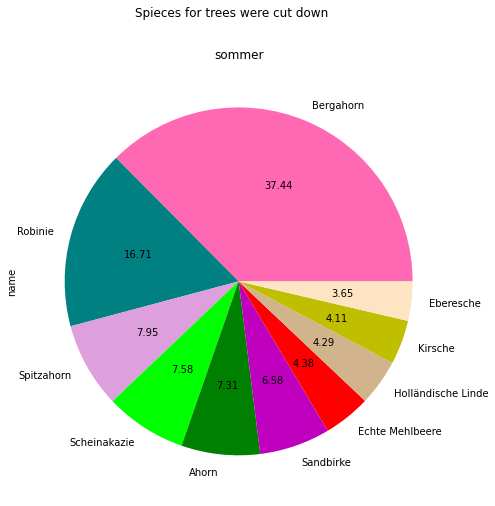

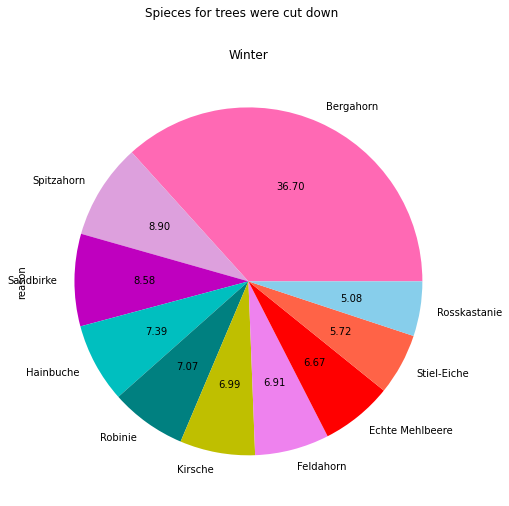

In [116]:
df = pd.read_csv("tree (2).csv", index_col=False)
df = df.drop(columns=["Unnamed: 0"])
fig, axes = plt.subplots(figsize=(8, 8))
df_p = df.loc[(df["season"] == "so")].groupby(["name"]).name.count().nlargest(10)
df_p.plot.pie(y="name", autopct='%.2f', colors=[color_dict2[key] for key in df_p.index])
fig.suptitle("Spieces for trees were cut down")
axes.set_title("sommer")
fig.savefig("pie_spiecies_so.png")


fig, axes = plt.subplots(figsize=(8, 8))
df_p = df.loc[(df["season"] == "win")].groupby(["name"]).reason.count().nlargest(10)
df_p.plot.pie(y="name", autopct='%.2f', colors=[color_dict2[key] for key in df_p.index])

fig.suptitle("Spieces for trees were cut down")
axes.set_title("Winter")
fig.savefig("pie_spiecies_win.png")

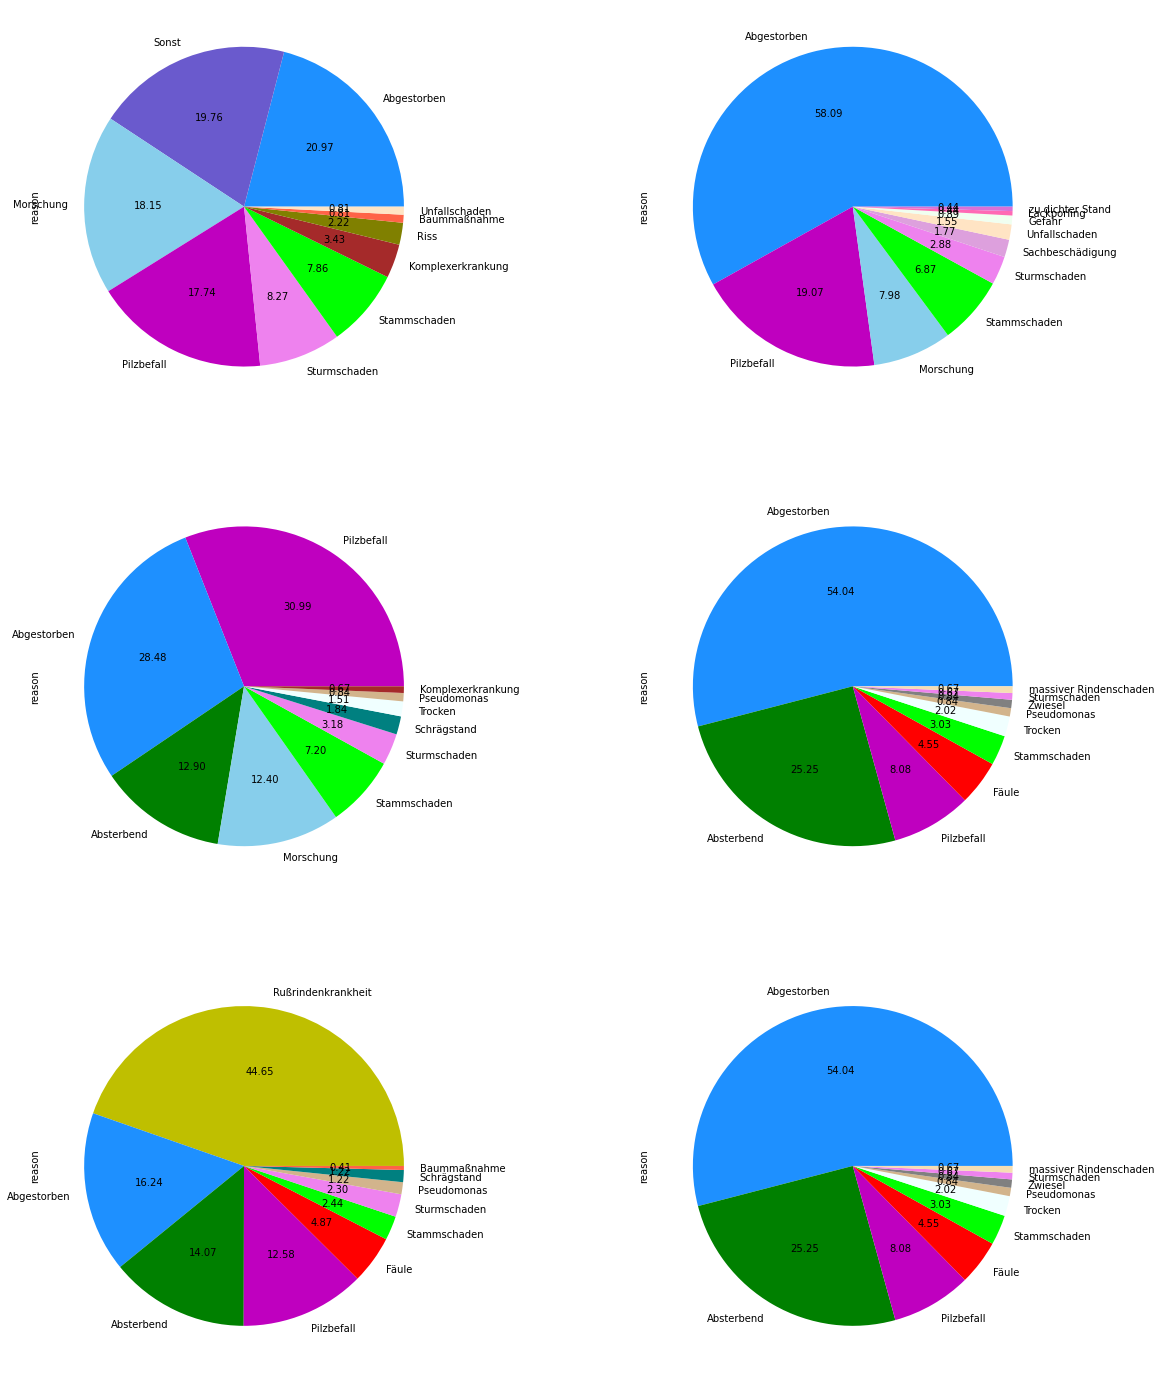

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 25))
df_p = df.loc[(df["season"] == "so") & (df["year"] == 2018)].groupby(["reason"]).reason.count().nlargest(10)
df_p.plot.pie(y="reason", autopct='%.2f', ax=axes[0,0], colors=[color_dict[key] for key in df_p.index])
df_p = df.loc[(df["season"] == "so") & (df["year"] == 2019)].groupby(["reason"]).reason.count().nlargest(10)
df_p.plot.pie(y="reason", autopct='%.2f', ax=axes[1,0], colors=[color_dict[key] for key in df_p.index])
df_p = df.loc[(df["season"] == "so") & (df["year"] == 2020)].groupby(["reason"]).reason.count().nlargest(10)
df_p.plot.pie(y="reason", autopct='%.2f', ax=axes[2,0], colors=[color_dict[key] for key in df_p.index])
df_p = df.loc[(df["season"] == "win") & (df["year"] == 2018)].groupby(["reason"]).reason.count().nlargest(10)
df_p.plot.pie(y="reason", autopct='%.2f', ax=axes[0,1], colors=[color_dict[key] for key in df_p.index])
df_p = df.loc[(df["season"] == "win") & (df["year"] == 2019)].groupby(["reason"]).reason.count().nlargest(10)
df_p.plot.pie(y="reason", autopct='%.2f', ax=axes[1,1], colors=[color_dict[key] for key in df_p.index])
df_P = df.loc[(df["season"] == "win") & (df["year"] == 2020)].groupby(["reason"]).reason.count().nlargest(10)
df_p.plot.pie(y="reason", autopct='%.2f', ax=axes[2,1], colors=[color_dict[key] for key in df_p.index])

fig.savefig("season_year.pdf")

In [215]:
def generate_random_location(num_pt, polygon):
  bounds_all = polygon.bounds
  minx = min(bounds_all.minx)
  maxx = max(bounds_all.maxx)
  miny = min(bounds_all.miny)
  maxy = max(bounds_all.maxy)

  i = 0
  x = []
  y = []
  while i < num_pt:
    x_t = np.random.uniform(minx, maxx)
    y_t = np.random.uniform(miny, maxy)
    for p in polygon:
      if Point(x_t, y_t).within(p):
        x.append(x_t)
        y.append(y_t)
        i = i + 1
        break

  return x, y

In [209]:
def location_to_plz(geo_df, col, loc_lst):
  polygon = geo_df[col]
  plz_lst = []
  for loc in loc_lst:
    for idx, val in enumerate(polygon):
      if Point(loc[0], loc[1]).within(val):
        plz_lst.append(geo_df.loc[idx, "plz"])
  return plz_lst


In [204]:
plz_shape_df = gpd.read_file('plz-gebiete.shp', dtype={'plz': str})
plz_region_df = pd.read_csv('zuordnung_plz_ort.csv', sep=',', dtype={'plz': str})
plz_region_df.drop('osm_id', axis=1, inplace=True)
germany_df = pd.merge(left=plz_shape_df, right=plz_region_df, on='plz', how='inner')
düsseldorf_df = germany_df.query('ort == "Düsseldorf"')


6.9407251


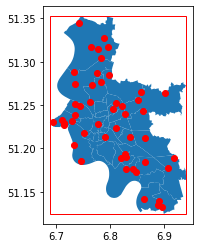

In [428]:
x, y = generate_random_location(50, düsseldorf_df["geometry"])
bounds_all = düsseldorf_df["geometry"].bounds
minx = min(bounds_all.minx)
maxx = max(bounds_all.maxx)
miny = min(bounds_all.miny)
maxy = max(bounds_all.maxy)
ax = düsseldorf_df.plot()

rect = patches.Rectangle((minx, miny), maxx-minx, maxy-miny, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
ax.plot(x, y, "ro")
plt.show()

In [331]:
df_ml = df.loc[:, ["lat", "lon", "season"]]
df_ml.loc[df_ml["season"]=="so", "season"] = 1
df_ml.loc[df_ml["season"]=="win", "season"] = 0
convert_column_dms2dd(df_ml, "lat")
convert_column_dms2dd(df_ml, "lon")
df_ml["result"] = 1

In [127]:
def dms2dd(dms):
  dms_lst = dms.split(".")
  d = float(dms_lst[0])
  m = float(dms_lst[1])
  s = float(dms_lst[2])
  sign = 1
  if d / d == -1:
    sign = -1
  dd = abs(d) + abs(m/60) + abs(s/(60*60));
  dd = sign * dd
  return dd

In [119]:
def convert_column_dms2dd(df, col):
  for i, v in enumerate(df[col]):
    if len(v.split(".")) == 3:
      df.loc[i, col] = dms2dd(v)
    else:
      df.loc[i, col] = float(v)

In [375]:
x, y = generate_random_location(5000, düsseldorf_df["geometry"])

6.9407251


In [376]:
df_ml_c = pd.DataFrame(data={"lat":y, "lon": x})
df_ml_c["season"] = 1
df_ml_c["result"] = 0
df_ml_c.loc[0:5000, "season"] = 0

In [378]:
frame_ml = [df_ml, df_ml_c]
df_ml_f = pd.concat(frame_ml, ignore_index=True)

In [379]:
x_ml = df_ml_f.loc[:, ["lat", "lon", "season"]]
y_ml = df_ml_f.loc[:, ["result"]]

In [395]:
X_train, X_test, y_train, y_test = train_test_split(x_ml.loc[:, ["lat", "lon"]], y_ml)

In [396]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train["result"])
clf.score(X_test, y_test["result"])

0.6210163652024118

In [382]:
# predict for winter
x_d, y_d = generate_random_location(10000, düsseldorf_df["geometry"])
df_d = pd.DataFrame(data={"lat":y_d, "lon": x_d})
df_d["season"] = 0

6.9407251


In [424]:
pp= clf.predict_proba(df_d.loc[:, ["lat", "lon"]])[:, 1]>0.43